# Edges of labels
When processing biological objects in image such as cells and nuclei, it may make sense to identify all pixels that lie on the surface of an object.
This notebook demonstrates how to select pixels on the border of nuclei, just in case we would like to measure intensity in the nuclear envelope.

In [2]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imread

cl.OCLArray([[20., 17., 17., ..., 28., 23., 20.],
       [23., 26., 18., ..., 23., 30., 20.],
       [16., 22., 16., ..., 31., 22., 42.],
       ...,
       [36., 35., 36., ..., 49., 38., 46.],
       [38., 27., 38., ..., 43., 40., 49.],
       [38., 39., 40., ..., 44., 36., 44.]], dtype=float32)
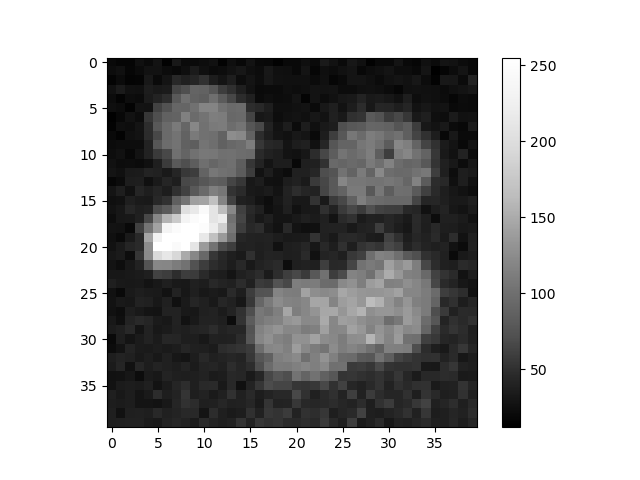
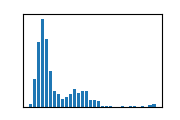

In [21]:
image = cle.asarray(imread("../../data/mitosis_mod.tif")[0:40,25:65])
image

We then segment the nuclei.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
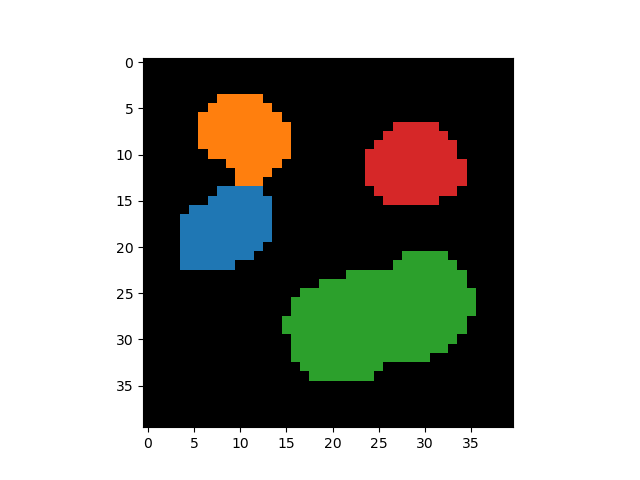

In [27]:
label_image = cle.voronoi_otsu_labeling(image, spot_sigma=2, outline_sigma=1)
label_image

From the nuclei label image we can extract another label image which contains all pixels that are on the edge of the labels.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
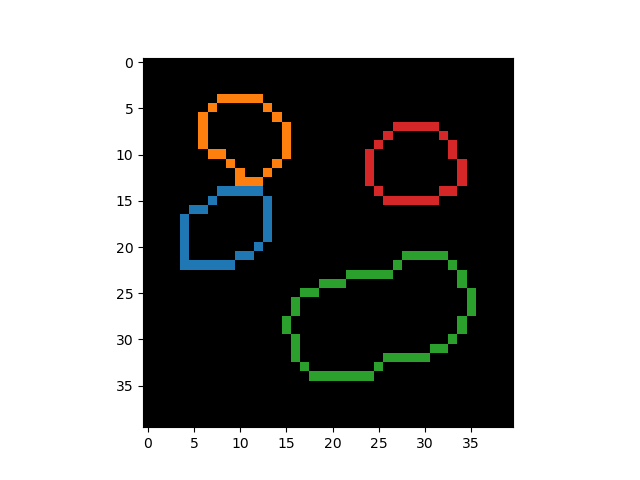

In [28]:
edge_label_image = cle.reduce_labels_to_label_edges(label_image)
edge_label_image

In case one wanted to measure in thicker areas along the borders, we could expand the borders.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
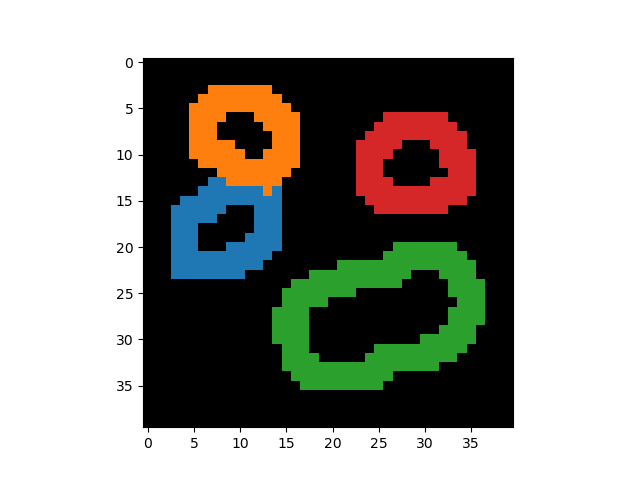

In [31]:
thicker_edges = cle.dilate_labels(edge_label_image, radius=1)
thicker_edges

For visualization purposes we can also view the original image with the label borders on top.

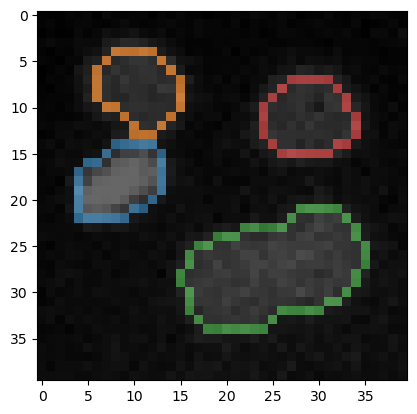

In [34]:
cle.imshow(image, continue_drawing=True)
cle.imshow(edge_label_image, alpha=0.6, labels=True)